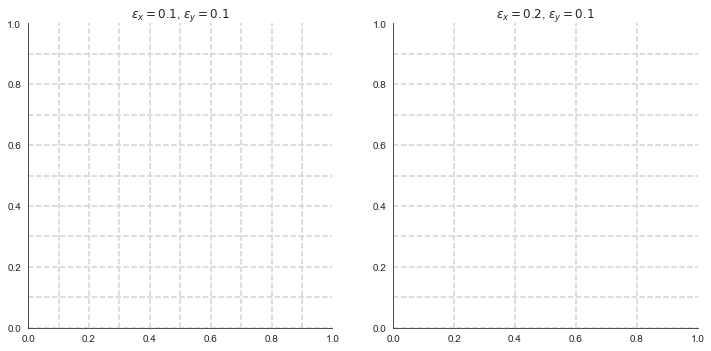

<Figure size 864x576 with 0 Axes>

In [1]:
sns.set_style('white')

fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

for i in np.arange(0, 1, 0.1):
    ax1.axhline(i, ls='--', c='lightgrey')
    ax1.axvline(i, ls='--', c='lightgrey')

ax1.set_title('$\epsilon_x=0.1$, $\epsilon_y=0.1$')

for i in np.arange(0, 1, 0.1):
    ax2.axhline(i, ls='--', c='lightgrey')

for i in np.arange(0, 1, 0.2):    
    ax2.axvline(i, ls='--', c='lightgrey')

ax2.set_title('$\epsilon_x=0.2$, $\epsilon_y=0.1$')
    
sns.despine()
plt.show()

sns.despine()

save_fig(fig, '.', 'epsilons')

plt.show()

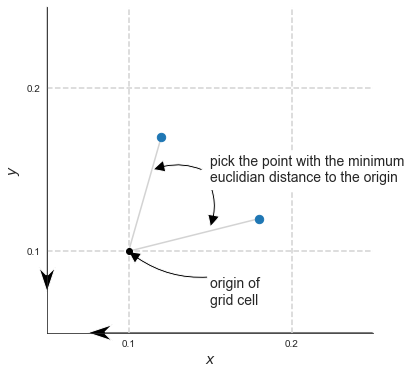

In [2]:
sns.set_style('white')

fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')

for i in np.arange(0, .3, 0.1):
    ax.axhline(i, ls='--', c='lightgrey')
    ax.axvline(i, ls='--', c='lightgrey')

ax.set_ylim(ymin=0.05, ymax=0.25)
ax.set_xlim(xmin=0.05, xmax=0.25)
    
ax.scatter([.12, .18],[.17, .12], s=70)
ax.set_xticks([0.1, 0.2])
ax.set_yticks([0.1, 0.2])

arrow_kwargs = {}
arrow_kwargs.setdefault('overhang', .3)
arrow_kwargs.setdefault('clip_on', False)
arrow_kwargs.update({'length_includes_head': True})
ax.arrow(0.25, 0.05, -0.175, 0, fc='k', lw=1, head_width=.01, **arrow_kwargs)
ax.arrow(0.05, 0.25, 0, -0.175, fc='k', lw=1, head_width=.01, **arrow_kwargs)

ax.plot([0.1], [0.1], 'o', color='k')
ax.annotate('origin of\ngrid cell', (0.1, 0.1), (0.15, .075), 
            arrowprops=dict(facecolor='black', connectionstyle="arc3,rad=-.2", width=2,),
            verticalalignment='center', size=20,
            ha='left',fontsize=14, zorder=0)

ax.plot([.12, .1], [.17, .1], color='lightgrey', zorder=0)
ax.plot([.18, .1], [.12, .1], color='lightgrey', zorder=0)

ax.annotate('pick the point with the minimum\neuclidian distance to the origin', (0.15, 0.115), (0.15, .15), 
            arrowprops=dict(facecolor='black', connectionstyle="arc3,rad=-.2", width=2,),
            verticalalignment='center',
            bbox=dict(fc='white'),
            ha='left',fontsize=14)

ax.annotate('', (0.115, 0.15), (0.145, 0.15), 
            arrowprops=dict(facecolor='black', connectionstyle="arc3,rad=.2", width=2,),
            verticalalignment='center',
            ha='left',fontsize=14, zorder=0)

ax.set_xlabel('$x$',fontsize=14)
ax.set_ylabel('$y$',fontsize=14)

save_fig(fig, '.', 'euclidian')

sns.despine()
plt.show()

todo::
* arrows for direction


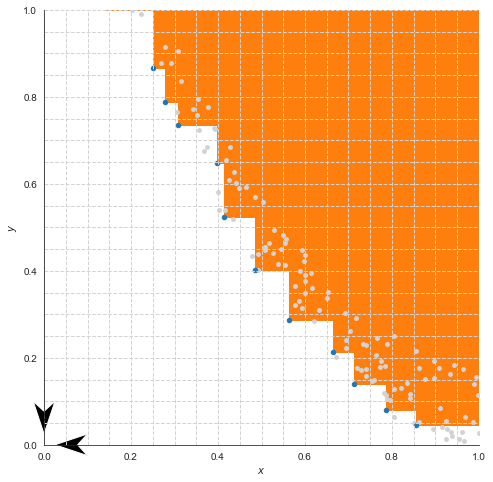

In [127]:
import pareto

x = 0.1+0.9*np.random.rand(150, )
y = 1.5*(x-1)**2+0.2*np.random.rand(150, )
data = pd.DataFrame(np.asarray([x,y]).T, columns=['x','y'])
nondominated = pareto.eps_sort([list(data.itertuples(False))], epsilons=[0.05, 0.05], )
nondominated = np.asarray(nondominated)

sns.set_style('white')

fig, ax1 = plt.subplots(figsize=(8,8))
ax1.set_aspect('equal')
ax1.set_ylim(ymin=0)
ax1.set_xlim(xmin=0)

arrow_kwargs = {}
arrow_kwargs.setdefault('overhang', .3)
arrow_kwargs.setdefault('clip_on', False)
arrow_kwargs.update({'length_includes_head': True})
ax1.arrow(1, 0, -0.975, 0, fc='k', lw=1, head_width=.05, **arrow_kwargs)
ax1.arrow(0, 1, 0, -0.975, fc='k', lw=1, head_width=.05, **arrow_kwargs)

for i in np.arange(0, max(np.max(x), np.max(y)), 0.05):
    ax1.axhline(i, ls='--', c='lightgrey', lw=1)
    ax1.axvline(i, ls='--', c='lightgrey', lw=1)

ax1.scatter(x, y, s=15, color='lightgrey')
ax1.scatter(nondominated[:,0], nondominated[:, 1], s=20)
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")


for entry in nondominated:
    rectangle = mpl.patches.Rectangle(entry, 1-entry[0], 1-entry[1], ec=(1.0, 0.4980392156862745, 0.054901960784313725),
                                      fc=(1.0, 0.4980392156862745, 0.054901960784313725), zorder=0)
    ax1.add_patch(rectangle)

save_fig(fig, '.', 'hypervolume')
    
sns.despine()
plt.show()

In [123]:
sns.color_palette()[1]

(1.0, 0.4980392156862745, 0.054901960784313725)